In [1]:
import matplotlib.pyplot as plt
import numpy
import scipy
import sys
sys.path.append('Models')
import Ionization.Ionization as Ionization
import Chemistry.Chemistry as Chemistry
import datetime
import IRI2016
import matplotlib


In [2]:
" instantiate the specific model classes"
ionization = Ionization.Ionization()
iri2016 = IRI2016.IRI2016()
chem = Chemistry.Chemistry()

In [3]:
"""
Generate the altitude grid and also setting up the time
"""
AltMinKm = 60.
AltMaxKm = 150.
AltStepKm = 1.0
altkm = numpy.arange(AltMinKm,AltMaxKm,AltStepKm)

t1970 = datetime.datetime(1970,1,1,0,0,0)
t2010 = datetime.datetime(2018,5,8,5,0,0)#datetime.datetime(2010,1,2,10,0,0)
tUnix = (t2010-t1970).total_seconds()

# location of poker flat research range
glat = 65.1256
glon = (360.-147.4919) # should be between 0-360 degrees

In [4]:
"""
Setting the background - this step must be run.
"""

chem.Set_Inital_Ionization(tUnix,glat,glon,AltMinKm,AltMaxKm,AltStepKm)

*** IRI parameters are being calculated ***
Ne: IRI-2001 for Topside
Ne, foF2: CCIR model is used.
Ne: B0,B1 Bil-2000
Ne, foF1: probability function used.
Ne, D: IRI1990
Ne, foF2: storm model included
Ion Com.: DS-95 & DY-85
Te: Aeros/AE/ISIS model
Auroral boundary model on
Ne, foE: storm model on
365
365
90


/Users/srkaeppler/Env3/Dregion3/lib/python3.9/site-packages/scipy/integrate/_ode.py:1013: UserWarning: vode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


izMin [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76
 77 78 79 80 81 82 83 84 85 86 87 88 89]
q0 (array([0]),)
i0 5
iz y0, 0 [1.98580991e+00 5.55967788e-01 3.64682451e+03 3.64541840e+03]
iz y0, 1 [4.10181997e+00 1.14831180e+00 5.97870233e+03 5.97585190e+03]
iz y0, 2 [8.36351660e+00 2.34111914e+00 8.71185513e+03 8.70622578e+03]
iz y0, 3 [1.68256025e+01 4.70906577e+00 1.13622001e+04 1.13514079e+04]
iz y0, 4 [3.31806071e+01 9.28417191e+00 1.41749700e+04 1.41552600e+04]
iz y0, 5 [   63.65604527    17.80484028 17333.85815066 17300.63632689]
iz y0, 6 [   79.1207685     22.12446902 17046.3014801  17009.18339636]
iz y0, 7 [   96.51369516    26.97926182 16588.43361449 16549.32229413]
iz y0, 8 [  115.66672685    32.32057313 15979.96231719 15941.96543905]
iz y0, 9 [  136.3399203     38.0792885  15243.03864339 15210.7218008 ]
iz

In [5]:
chem.DregionChem.keys()

dict_keys(['alphaD', 'alphaDC', 'alphaI', 'beta', 'B', 'gamma', 'gammaX', 'Xbar'])

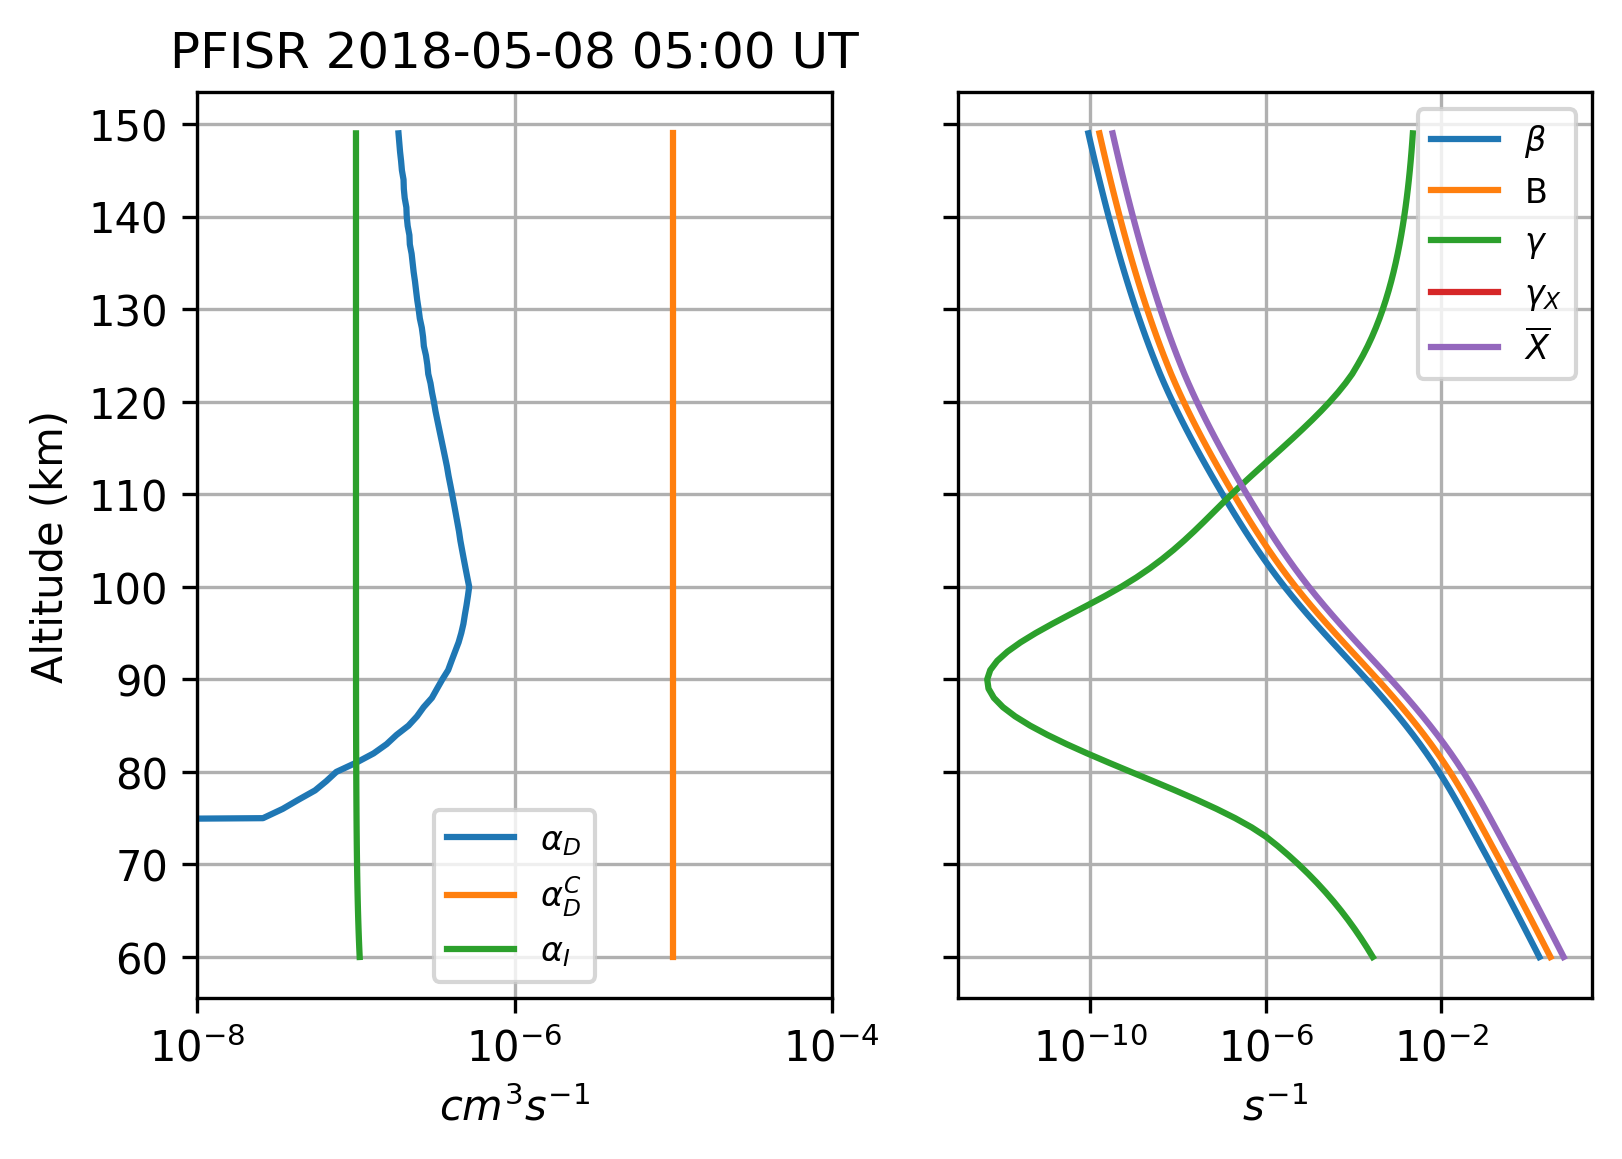

In [6]:

f,ax = plt.subplots(1,2, sharey=True, dpi=300, figsize=(6,4),facecolor="w")
# plt.figure(dpi=300)
ax[0].semilogx(chem.DregionChem['alphaD'], chem.altkm, label=r'$\alpha_{D}$')
ax[0].semilogx(chem.DregionChem['alphaDC'], chem.altkm, label=r'$\alpha_{D}^{C}$')
ax[0].semilogx(chem.DregionChem['alphaI'], chem.altkm, label=r'$\alpha_{I}$')
ax[0].legend(prop={'size': 8})
ax[0].set_yticks([60,70,80,90,100,110,120,130,140,150])
ax[0].set_xlim([1e-8,1e-4])
ax[0].set_xlabel(r'$cm^{3}s^{-1}$')
ax[0].set_ylabel('Altitude (km)')
ax[0].grid()

ax[1].semilogx(chem.DregionChem['beta'], chem.altkm, label=r'$\beta$')
ax[1].semilogx(chem.DregionChem['B'], chem.altkm, label='B')
ax[1].semilogx(chem.DregionChem['gamma'], chem.altkm, label=r'$\gamma$')
ax[1].semilogx(chem.DregionChem['gammaX'], chem.altkm, label=r'$\gamma_{X}$')
ax[1].semilogx(chem.DregionChem['Xbar'], chem.altkm, label = r'$\overline{X}$')
ax[1].legend(prop={'size': 8})
ax[1].set_yticks([60,70,80,90,100,110,120,130,140,150])
ax[1].set_xlabel(r'$s^{-1}$')
ax[1].grid()

ax[0].set_title('PFISR 2018-05-08 05:00 UT')
plt.subplots_adjust(hspace=0)
plt.savefig('Figure1.png',bbox_inches='tight')

In [7]:
chem.y0.keys()

dict_keys(['Ne', 'NnegIon', 'NposCluster', 'NX', 'NposIon'])

([<matplotlib.axis.YTick at 0x12c6cc490>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

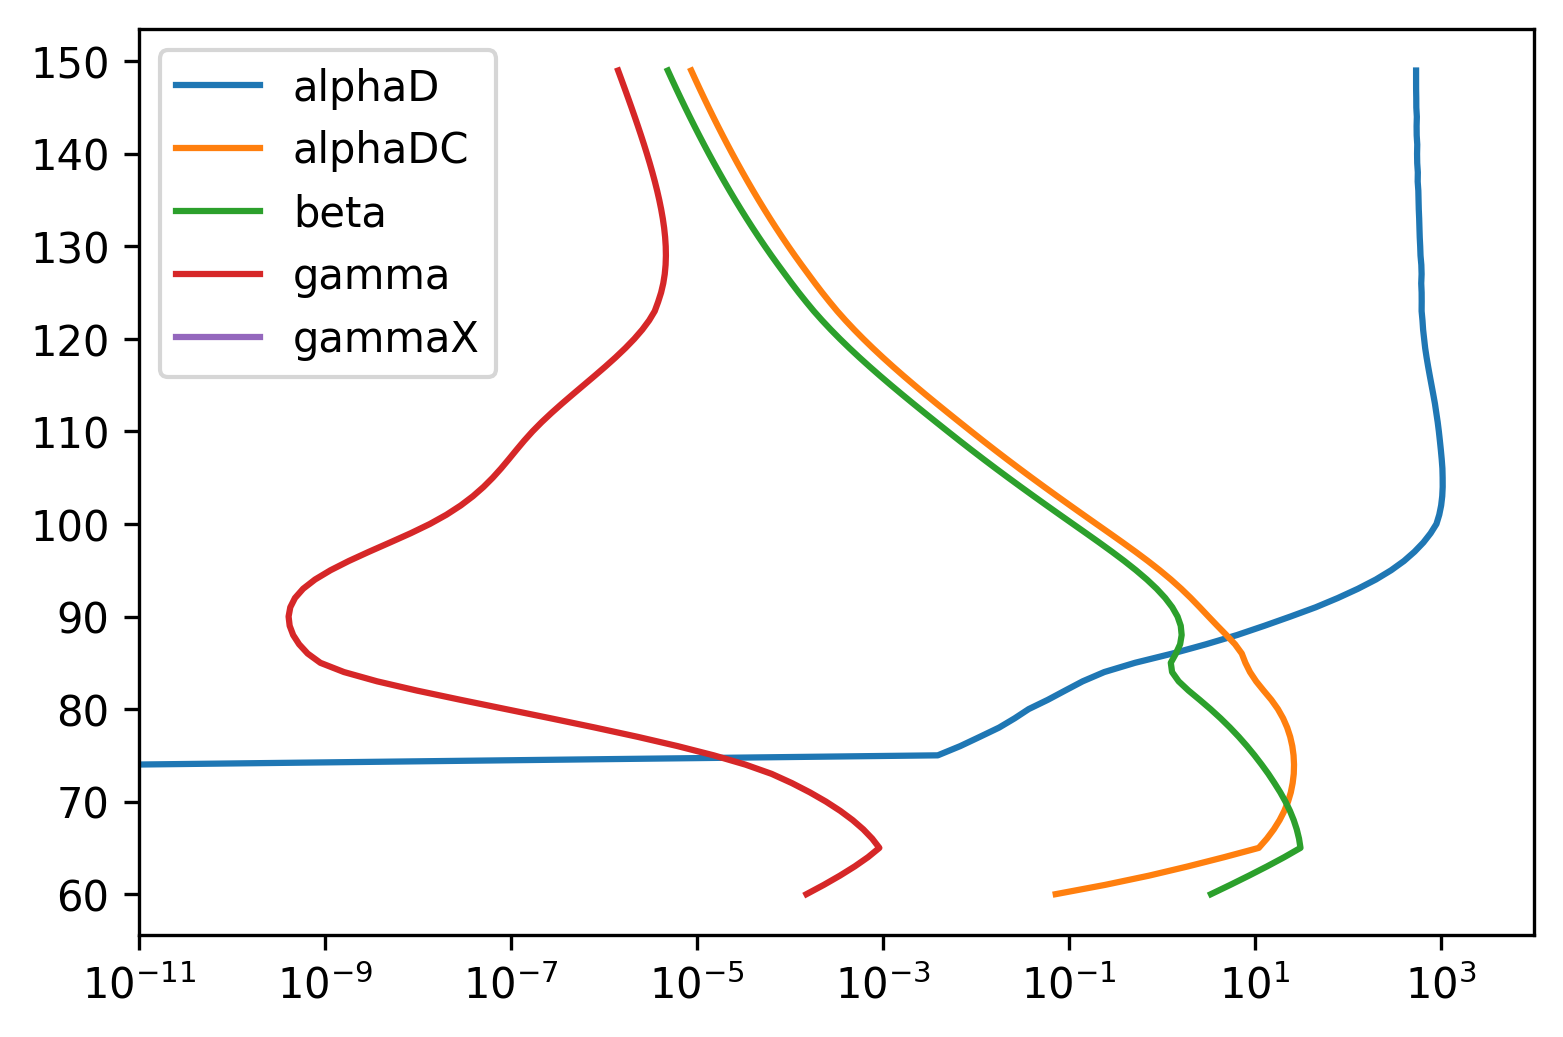

In [8]:
plt.figure(dpi=300)
plt.semilogx(chem.DregionChem['alphaD']*chem.y0['Ne']*chem.y0['NposIon'], chem.altkm, label='alphaD')
plt.semilogx(chem.DregionChem['alphaDC']*chem.y0['Ne']*chem.y0['NposCluster'], chem.altkm, label='alphaDC')
# plt.semilogx(chem.DregionChem['alphaI'], chem.altkm, label='alphaI')
plt.semilogx(chem.DregionChem['beta']*chem.y0['Ne'], chem.altkm, label='beta')
# plt.semilogx(chem.DregionChem['B'], chem.altkm, label='B')
plt.semilogx(chem.DregionChem['gamma']*chem.y0['NnegIon'], chem.altkm, label='gamma')
plt.semilogx(chem.DregionChem['gammaX']*chem.y0['NX'], chem.altkm, label='gammaX')
# plt.semilogx(chem.DregionChem['Xbar'], chem.altkm, label = 'Xbar')
plt.legend()
plt.xlim([1e-11,1e4])
plt.yticks([60,70,80,90,100,110,120,130,140,150])

(1, 100000.0)

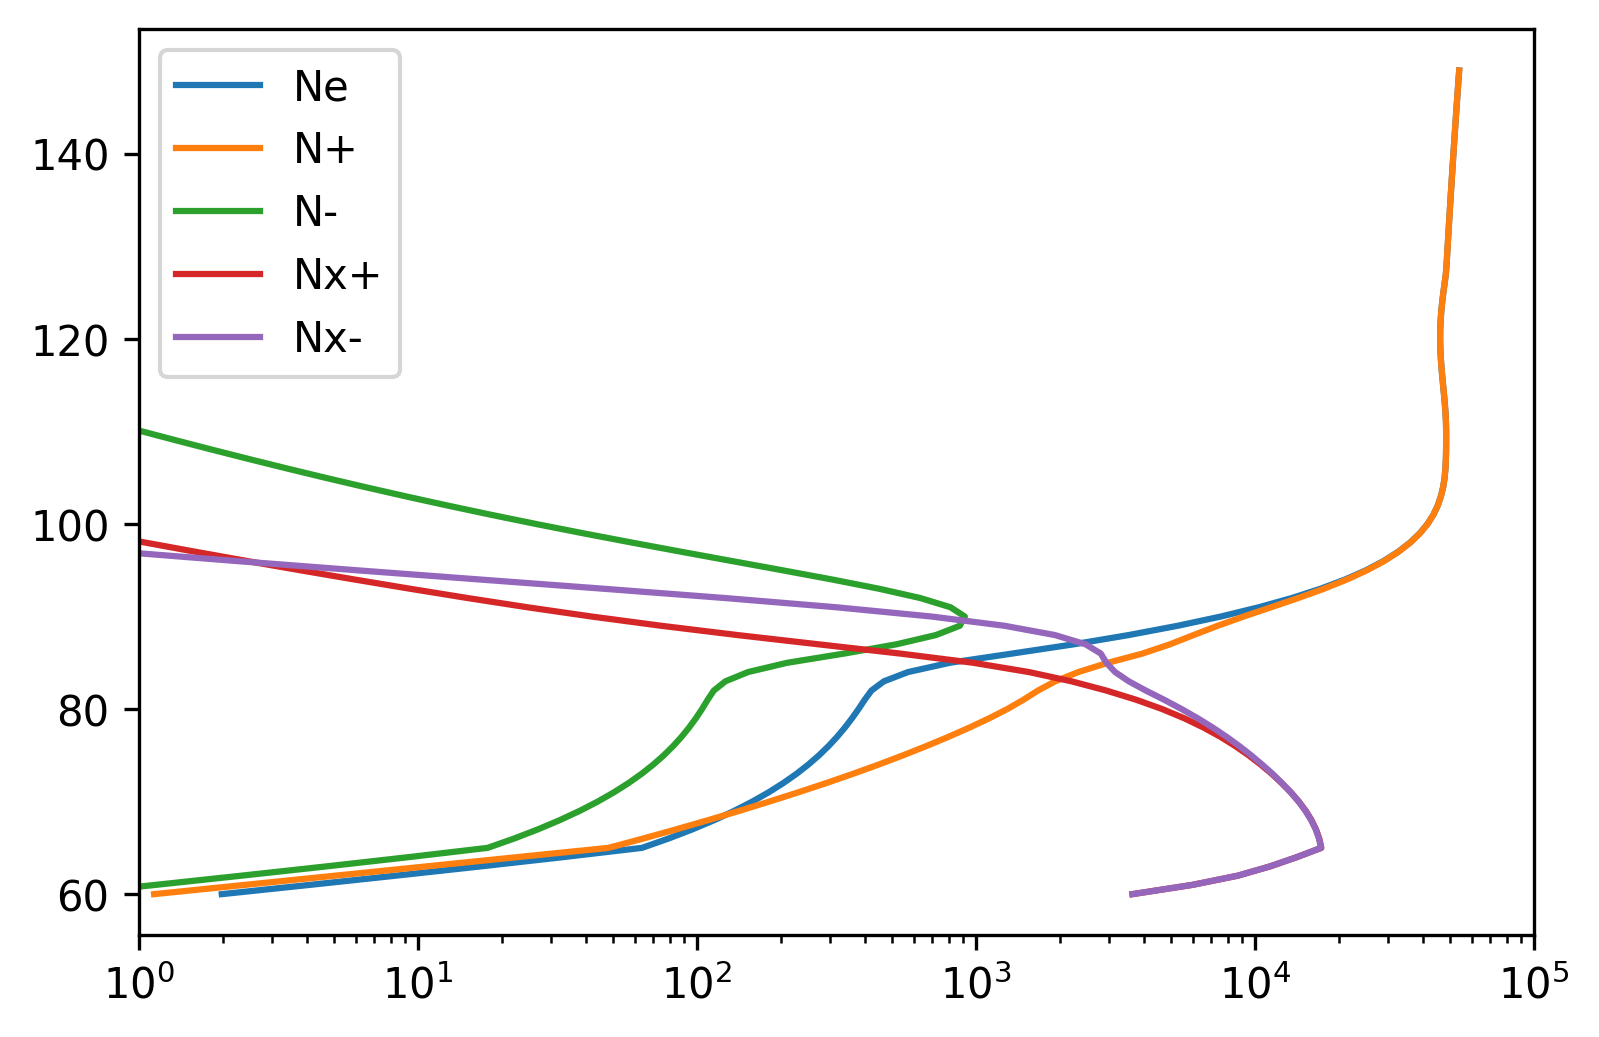

In [9]:
plt.figure(dpi=300)
plt.semilogx(chem.y0['Ne'], chem.altkm, label='Ne')
plt.semilogx(chem.y0['NposIon'], chem.altkm, label = 'N+')
plt.semilogx(chem.y0['NnegIon'], chem.altkm, label = 'N-')
plt.semilogx(chem.y0['NposCluster'], chem.altkm, label='Nx+')
plt.semilogx(chem.y0['NX'], chem.altkm, label='Nx-')
plt.legend()
plt.xlim([1,1e5])

In [10]:
EeV = numpy.array([10000.]) # eV
QeV = numpy.array([1.]) # mW/m^2
qZ, qZE,qfoo = ionization.Ionization(EeV,QeV,AltMinKm,AltMaxKm,AltStepKm,tUnix,glat,glon)
qZ[qZ<1e-2] = 1e-2

365


365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365
365


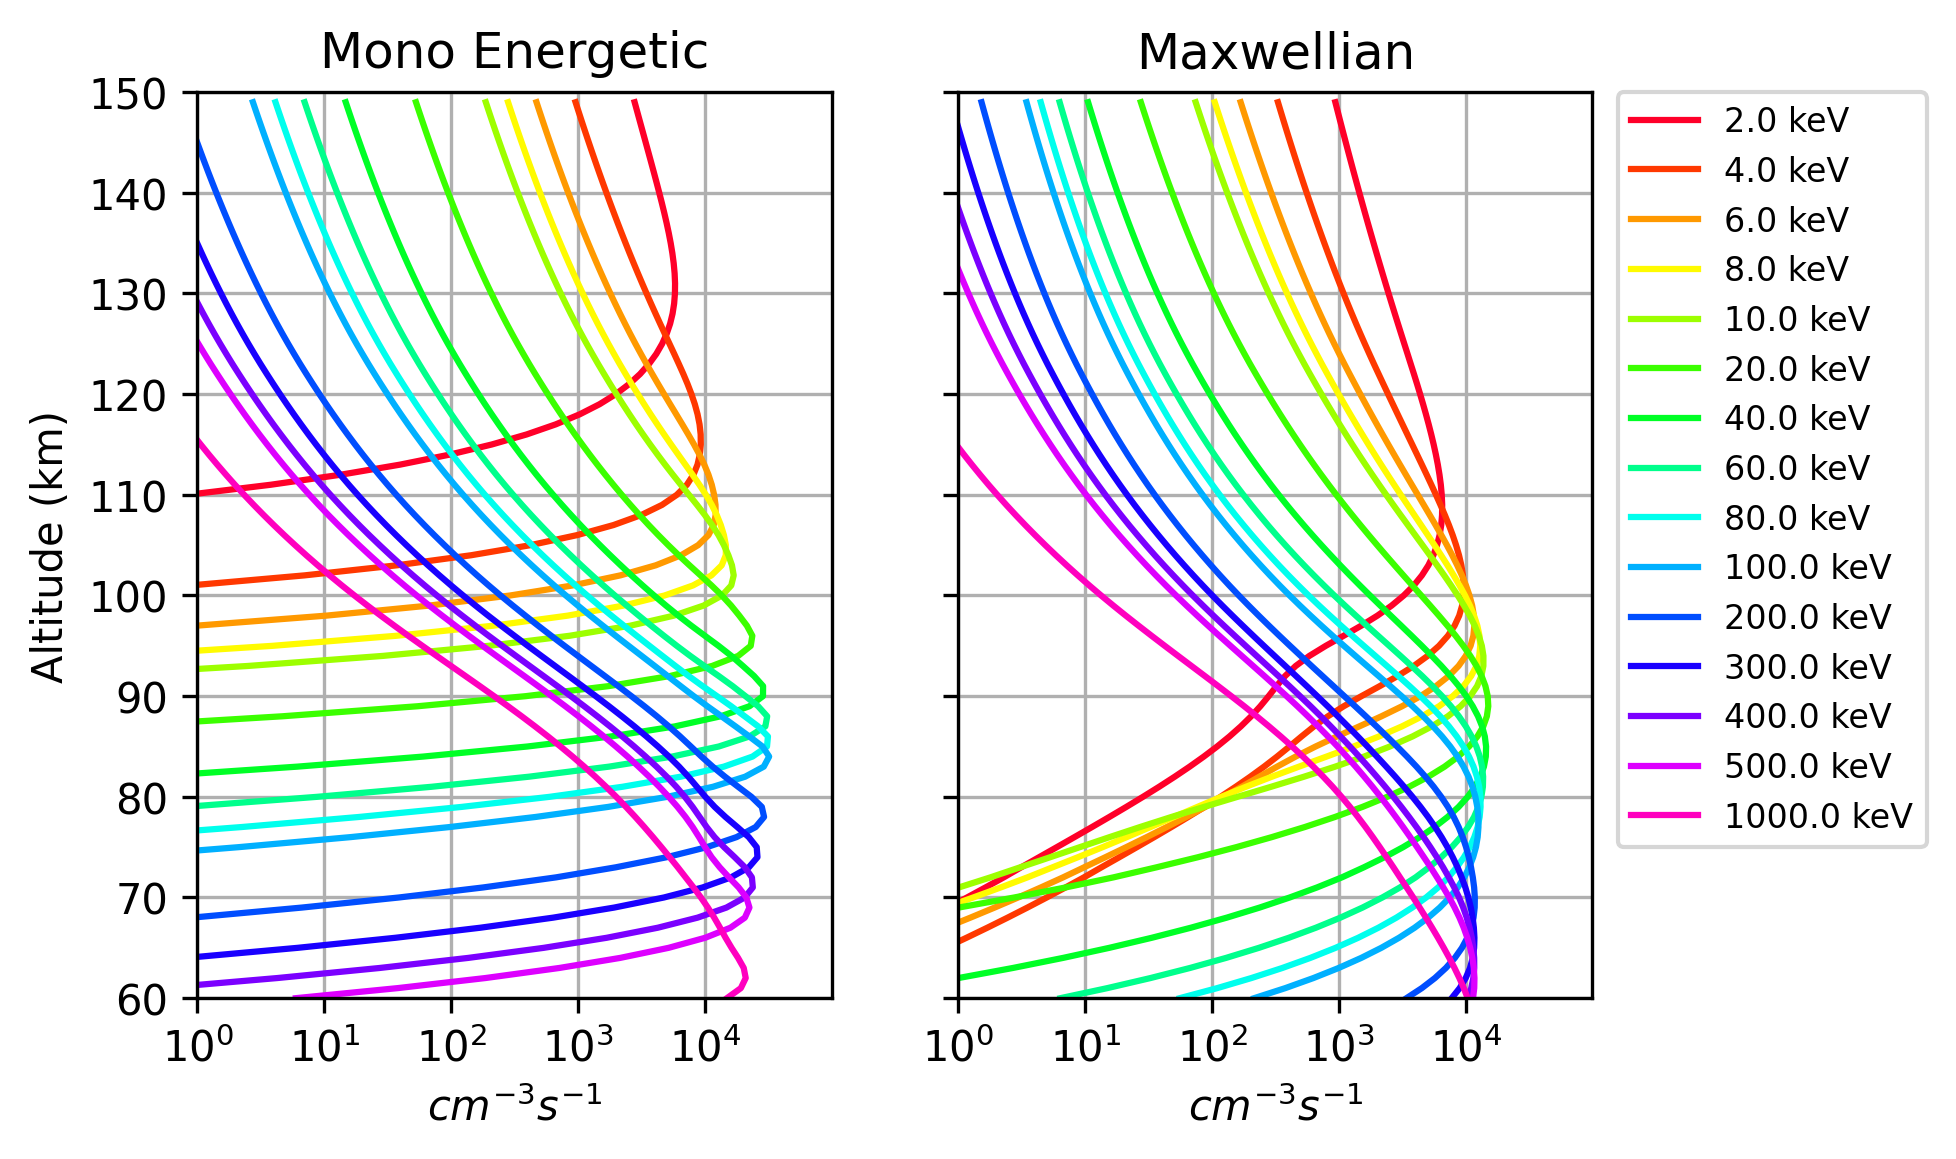

In [11]:
f,ax = plt.subplots(1,2, sharey=True, dpi=300, figsize=(6,4),facecolor="w")

EeV = numpy.array([2.,4.,6.,8.,10.,20.,40.,60.,80.,100.,200.,300.,400.,500.,1000.])*1000.
QeV = numpy.array([1.]) # mW/m^2

# ncolors = numpy.arange(1, EeV.shape[0]+1)
color = plt.cm.gist_rainbow(numpy.linspace(0, 1, EeV.shape[0]))

k = 0
for iEnergy in EeV:
    qZ, qZE,qfoo = ionization.Ionization(numpy.array([iEnergy]),QeV,AltMinKm,AltMaxKm,AltStepKm,tUnix,glat,glon)
    qZ[qZ<1e-2] = 1e-2
    ax[0].semilogx(qZ, chem.altkm, color=color[k],label='%s keV'%(iEnergy/1000.))
    k=k+1
ax[0].set_xlim([1,1e5])
# ax[0].legend(prop={'size': 6})
ax[0].set_ylim([60,150])
ax[0].set_yticks([60,70,80,90,100,110,120,130,140,150])
ax[0].set_ylabel('Altitude (km)')
ax[0].set_title('Mono Energetic')
ax[0].set_xlabel(r'$cm^{-3} s^{-1}$')
ax[0].set_xticks([1,1e1,1e2,1e3,1e4])
ax[0].grid()


del qZ
k = 0
for iEnergy in EeV:
    qZ, qZE,qfoo = ionization.Ionization(numpy.array([iEnergy]),QeV,AltMinKm,AltMaxKm,AltStepKm,tUnix,glat,glon, IonizationType='Maxwellian')
    qZ[qZ<1e-2] = 1e-2
    ax[1].semilogx(qZ, chem.altkm, color=color[k], label='%s keV'%(iEnergy/1000.))
    k=k+1
ax[1].set_xlim([1,1e5])
# ax[1].legend(prop={'size': 6})
ax[1].set_ylim([60,150])
ax[1].set_yticks([60,70,80,90,100,110,120,130,140,150])
ax[1].set_title('Maxwellian')
ax[1].set_xticks([1,1e1,1e2,1e3,1e4])
ax[1].set_xlabel(r'$cm^{-3} s^{-1}$')
ax[1].grid()

ax[1].legend(prop={'size': 8},bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.savefig('Figure2.png',bbox_inches='tight')

365
365
365
365
365
365
365
365
365
365
365
365
365
365
365


(1, 1000000.0)

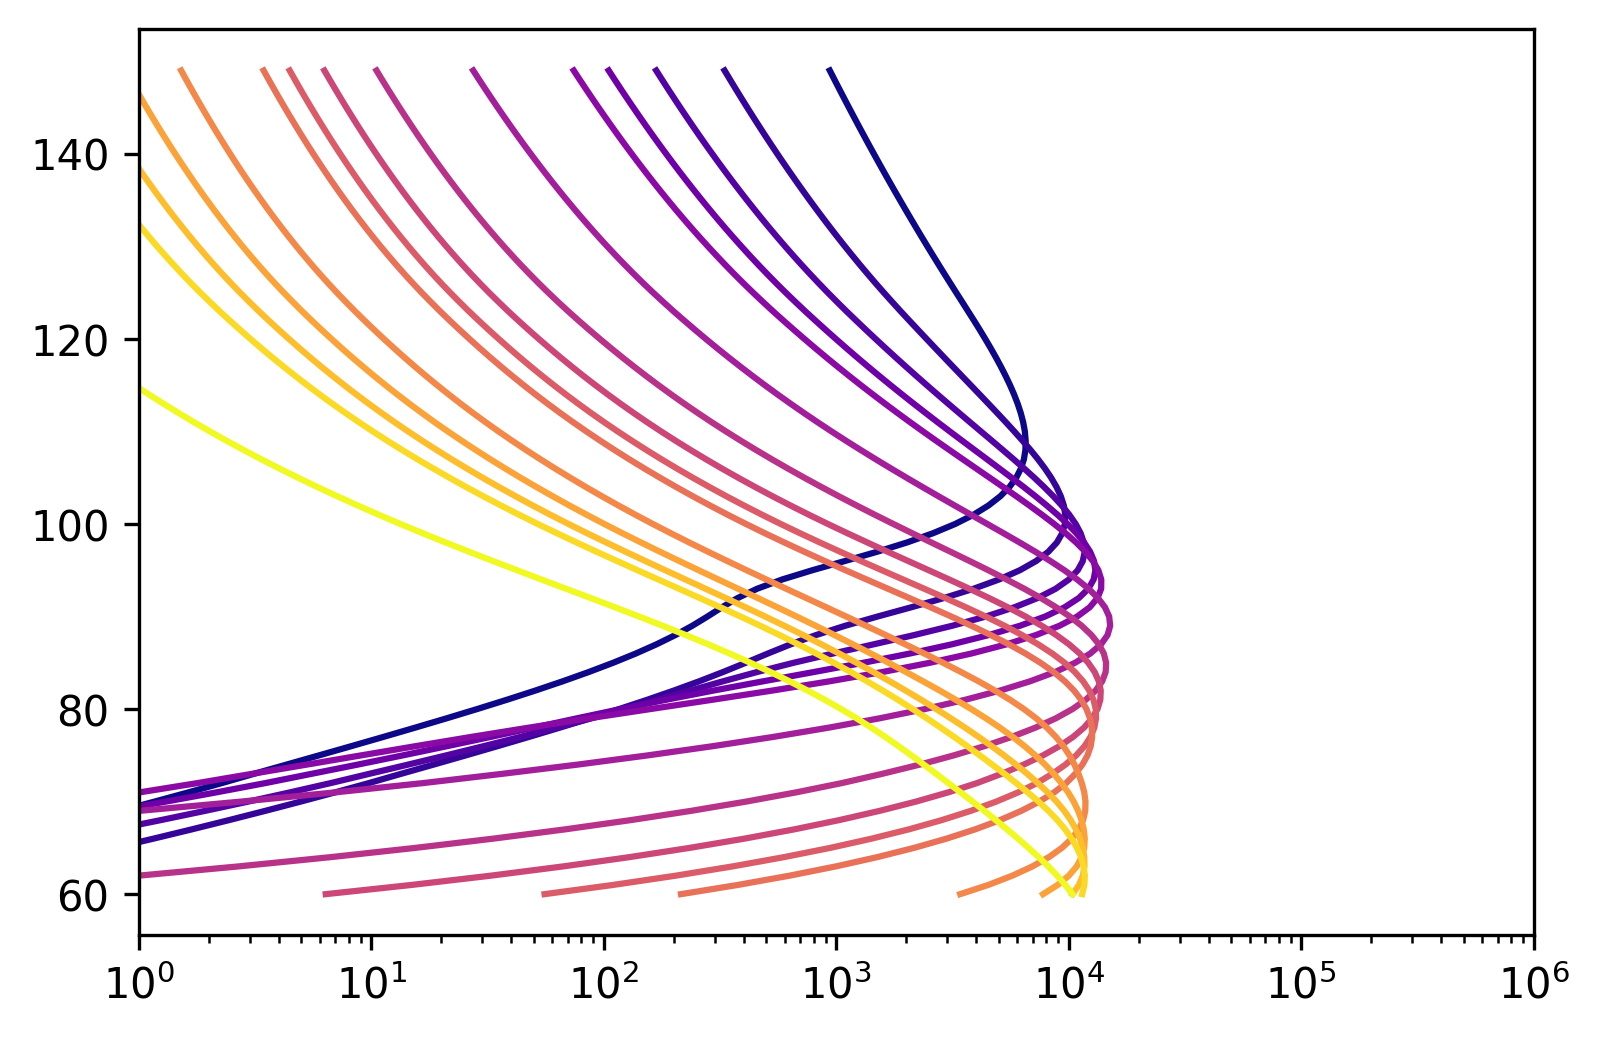

In [11]:
plt.figure(dpi=300)

EeV = numpy.array([2.,4.,6.,8.,10.,20.,40.,60.,80.,100.,200.,300.,400.,500.,1000.])*1000.
QeV = numpy.array([1.]) # mW/m^2

# ncolors = numpy.arange(1, EeV.shape[0]+1)
color = plt.cm.plasma(numpy.linspace(0, 1, EeV.shape[0]))

k = 0
for iEnergy in EeV:
    qZ, qZE,qfoo = ionization.Ionization(numpy.array([iEnergy]),QeV,AltMinKm,AltMaxKm,AltStepKm,tUnix,glat,glon, IonizationType='Maxwellian')
    qZ[qZ<1e-2] = 1e-2
    plt.semilogx(qZ, chem.altkm, color=color[k], 
    k=k+1
plt.xlim([1,1e5])

In [ ]:
EeV = numpy.array([300000.]) # eV
QeV = numpy.array([1.]) # mW/m^2
qZ, qZE,qfoo = ionization.Ionization(EeV,QeV,AltMinKm,AltMaxKm,AltStepKm,tUnix,glat,glon)
qZ[qZ<1e-2] = 1e-2

ChemOut = chem(qZ,chem.altkm, IntegrationTime = 1.)


f, ax = plt.subplots(1,2, sharey=True, dpi=300, figsize=(6,4),facecolor="w")

ax[0].semilogx(chem.y0['Ne'], chem.altkm, label=r'$n_{e}$')
ax[0].semilogx(chem.y0['NposIon'], chem.altkm, label = r'$n^{+}$')
ax[0].semilogx(chem.y0['NnegIon'], chem.altkm, label = r'$n^{-}$')
ax[0].semilogx(chem.y0['NposCluster'], chem.altkm, label=r'$n_{x}^{+}$')
ax[0].semilogx(chem.y0['NX'], chem.altkm, label=r'$n_{x}^{-}$')

ax[1].semilogx(ChemOut['Ne'], chem.altkm, label=r'$n_{e}$')
ax[1].semilogx(ChemOut['NposIon'], chem.altkm, label = r'$n^{+}$')
ax[1].semilogx(ChemOut['NnegIon'], chem.altkm, label = r'$n^{-}$')
ax[1].semilogx(ChemOut['NposCluster'], chem.altkm, label=r'$n_{x}^{+}$')
ax[1].semilogx(ChemOut['NX'], chem.altkm, label=r'$n_{x}^{-}$')
ax[1].legend()
ax[0].legend()
ax[1].set_xlim([1e-5,1e6])
ax[0].set_xlim([1e-5,1e6])

ax[0].set_title('PFISR 2018-05-08 05:00 UT' + '\n' + 'Background')
ax[1].set_title(r'$Q = 1 mW/m^{2}$, $E = 300 keV$,'+'\n'+'IntTime = 1s')
ax[0].set_ylabel('Altitude (km)')
ax[0].set_xlabel(r'$cm^{-3}$')
ax[1].set_xlabel(r'$cm^{-3}$')
ax[0].grid()
ax[1].grid()

plt.savefig('Figure3.png',bbox_inches='tight')


# plt.semilogx(qZ, chem.altkm)


In [12]:
EeV = numpy.array([300000.]) # eV
QeV = numpy.array([1.]) # mW/m^2
qZ, qZE,qfoo = ionization.Ionization(EeV,QeV,AltMinKm,AltMaxKm,AltStepKm,tUnix,glat,glon)
qZ[qZ<1e-2] = 1e-2


ChemOut0 = chem(qZ,chem.altkm, IntegrationTime = 0.01)
ChemOut1 = chem(qZ,chem.altkm, IntegrationTime = 0.1)
ChemOut2 = chem(qZ,chem.altkm, IntegrationTime = 1.0)
ChemOut3 = chem(qZ,chem.altkm, IntegrationTime = 5.0)
ChemOut4 = chem(qZ,chem.altkm, IntegrationTime = 10.0)
ChemOut5 = chem(qZ,chem.altkm, IntegrationTime = 60.0)
ChemOut6 = chem(qZ,chem.altkm, IntegrationTime = 300.0)

EeV = numpy.array([50000.]) # eV
QeV = numpy.array([1.]) # mW/m^2
qZ, qZE,qfoo = ionization.Ionization(EeV,QeV,AltMinKm,AltMaxKm,AltStepKm,tUnix,glat,glon)
qZ[qZ<1e-2] = 1e-2

ChemOut7 = chem(qZ,chem.altkm, IntegrationTime = 0.1)
ChemOut8 = chem(qZ,chem.altkm, IntegrationTime = 1.0)
ChemOut9 = chem(qZ,chem.altkm, IntegrationTime = 5.0)
ChemOut10 = chem(qZ,chem.altkm, IntegrationTime = 10.0)
ChemOut11 = chem(qZ,chem.altkm, IntegrationTime = 60.0)
ChemOut12 = chem(qZ,chem.altkm, IntegrationTime = 300.0)

EeV = numpy.array([10000.]) # eV
QeV = numpy.array([1.]) # mW/m^2
qZ, qZE,qfoo = ionization.Ionization(EeV,QeV,AltMinKm,AltMaxKm,AltStepKm,tUnix,glat,glon)
qZ[qZ<1e-2] = 1e-2

ChemOut13 = chem(qZ,chem.altkm, IntegrationTime = 0.1)
ChemOut14 = chem(qZ,chem.altkm, IntegrationTime = 1.0)
ChemOut15 = chem(qZ,chem.altkm, IntegrationTime = 5.0)
ChemOut16 = chem(qZ,chem.altkm, IntegrationTime = 10.0)
ChemOut17 = chem(qZ,chem.altkm, IntegrationTime = 60.0)
ChemOut18 = chem(qZ,chem.altkm, IntegrationTime = 300.0)


365
IntegrationTime 0.01
qz.shape, altkm.shape (90,) (90,)
self.y0, self.altkm (90,) (90,)
60.0 60.0 0.01 3.45409040016471
61.0 61.0 0.01 5.691236856958655
62.0 62.0 0.01 9.380087145061559
63.0 63.0 0.08316322156433491 15.462344505950677
64.0 64.0 0.8146514828726388 25.490620334359836
65.0 65.0 6.161015439210906 42.024742870387755
66.0 66.0 36.439149978814314 43.38546708465951
67.0 67.0 170.5637398813173 44.27955070689971
68.0 68.0 638.732947440097 44.70317511210979
69.0 69.0 1932.4274179829847 44.657710120092396
70.0 70.0 4764.184257484477 44.14980549708863
71.0 71.0 9643.437884346993 43.19252006010007
72.0 72.0 16128.496648315713 41.80672544408314
73.0 73.0 22283.426527572756 40.23558706404926
74.0 74.0 26048.47228547017 38.26443795010597
75.0 75.0 25701.769927124267 36.05105407139602
76.0 76.0 22230.240698210666 33.55304375144257
77.0 77.0 18064.34532394563 30.77025248654834
78.0 78.0 14572.796883597586 27.730427077596048
79.0 79.0 11981.390769841719 24.482852531121356
80.0 80.0 101

(90,)
###############################
365
IntegrationTime 0.1
qz.shape, altkm.shape (90,) (90,)
self.y0, self.altkm (90,) (90,)
60.0 60.0 0.01 3.45409040016471
61.0 61.0 0.01 5.691236856958655
62.0 62.0 0.01 9.380087145061559
63.0 63.0 0.01 15.462344505950677
64.0 64.0 0.01 25.490620334359836
65.0 65.0 0.01 42.024742870387755
66.0 66.0 0.01 43.38546708465951
67.0 67.0 0.01 44.27955070689971
68.0 68.0 0.01 44.70317511210979
69.0 69.0 0.01 44.657710120092396
70.0 70.0 0.01 44.14980549708863
71.0 71.0 0.01 43.19252006010007
72.0 72.0 0.01 41.80672544408314
73.0 73.0 0.01 40.23558706404926
74.0 74.0 0.01 38.26443795010597
75.0 75.0 0.01 36.05105407139602
76.0 76.0 0.01 33.55304375144257
77.0 77.0 0.01 30.77025248654834
78.0 78.0 0.01 27.730427077596048
79.0 79.0 0.010521842095276283 24.482852531121356
80.0 80.0 0.2139873818586593 21.099084337665655
81.0 81.0 3.054529533145139 17.678899289214222
82.0 82.0 30.627331607889456 14.465754839506499
83.0 83.0 216.37210920698126 11.995081588355992


(90,)
###############################
365
IntegrationTime 0.1
qz.shape, altkm.shape (90,) (90,)
self.y0, self.altkm (90,) (90,)
60.0 60.0 0.01 3.45409040016471
61.0 61.0 0.01 5.691236856958655
62.0 62.0 0.01 9.380087145061559
63.0 63.0 0.01 15.462344505950677
64.0 64.0 0.01 25.490620334359836
65.0 65.0 0.01 42.024742870387755
66.0 66.0 0.01 43.38546708465951
67.0 67.0 0.01 44.27955070689971
68.0 68.0 0.01 44.70317511210979
69.0 69.0 0.01 44.657710120092396
70.0 70.0 0.01 44.14980549708863
71.0 71.0 0.01 43.19252006010007
72.0 72.0 0.01 41.80672544408314
73.0 73.0 0.01 40.23558706404926
74.0 74.0 0.01 38.26443795010597
75.0 75.0 0.01 36.05105407139602
76.0 76.0 0.01 33.55304375144257
77.0 77.0 0.01 30.77025248654834
78.0 78.0 0.01 27.730427077596048
79.0 79.0 0.01 24.482852531121356
80.0 80.0 0.01 21.099084337665655
81.0 81.0 0.01 17.678899289214222
82.0 82.0 0.01 14.465754839506499
83.0 83.0 0.01 11.995081588355992
84.0 84.0 0.01 10.409751079904998
85.0 85.0 0.01 9.685570168355884
86.0

(90,)
###############################


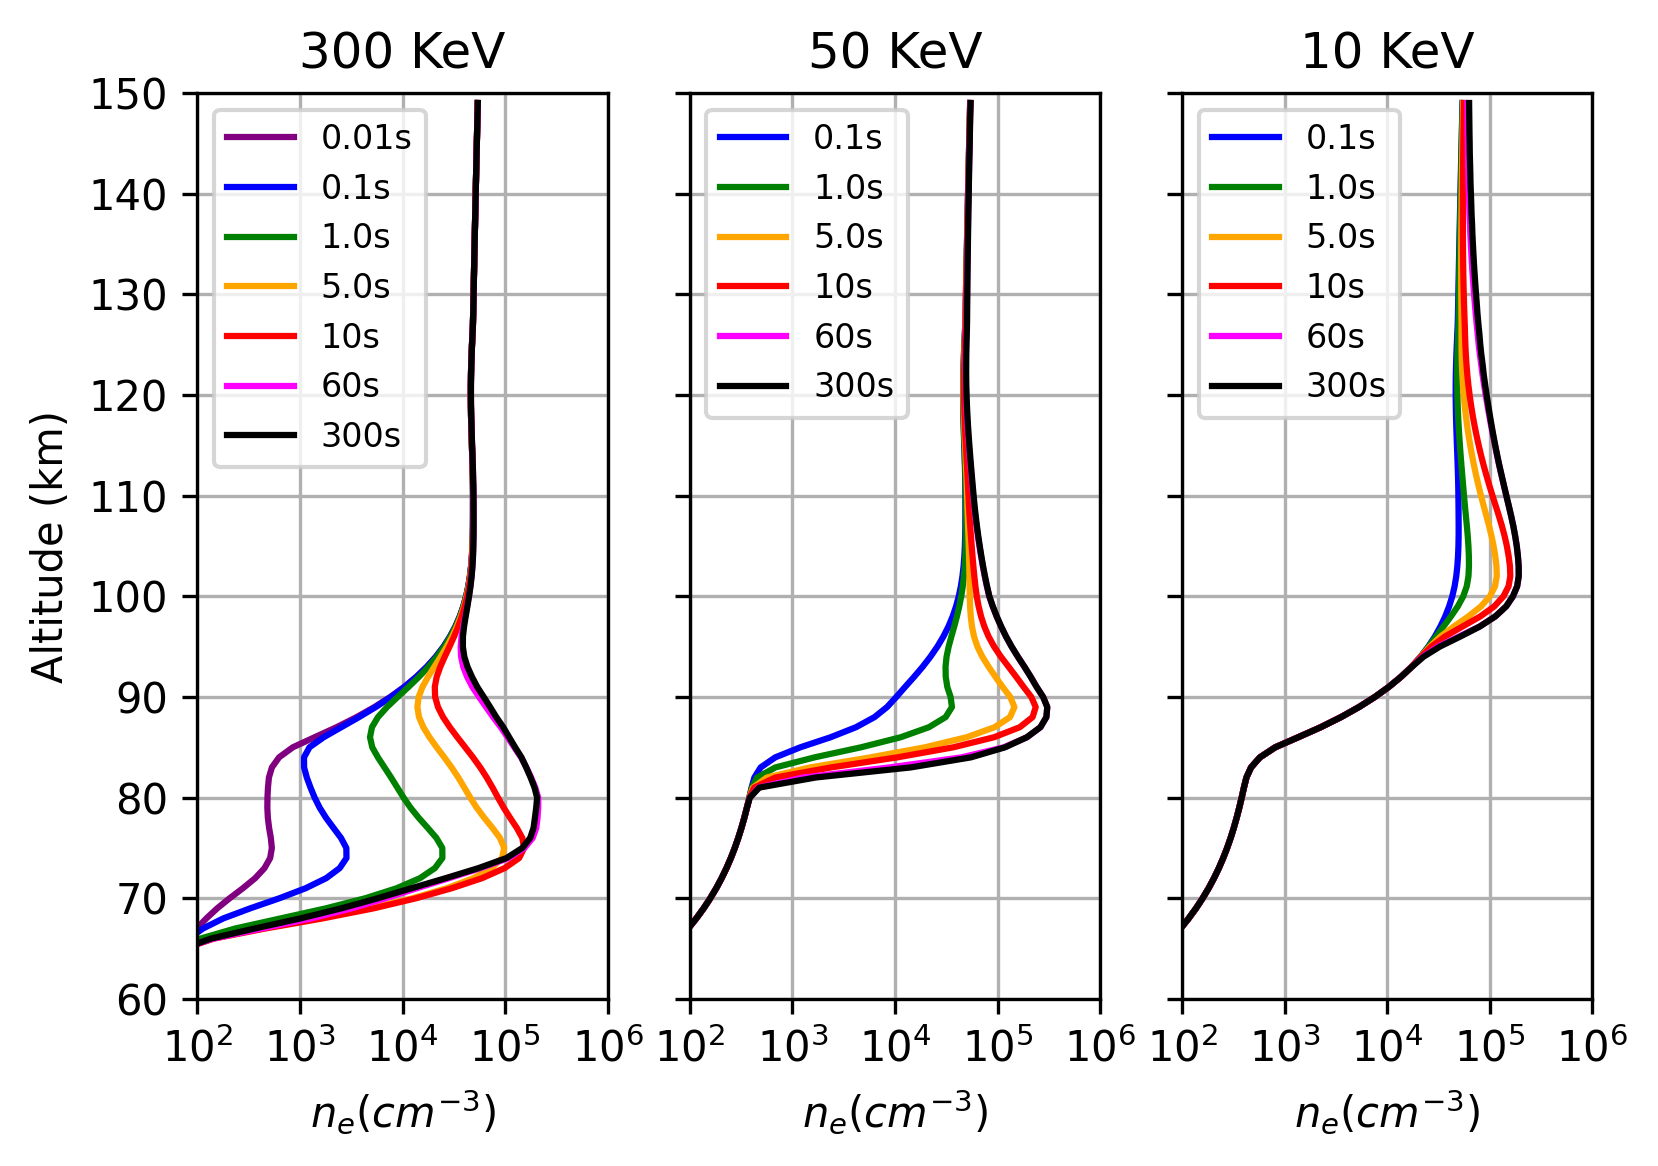

In [14]:
f, ax = plt.subplots(1,3, sharey=True, dpi=300, figsize=(6,4),facecolor="w")

ax[0].semilogx(ChemOut0['Ne'], chem.altkm, label=r'0.01s', color='purple')
ax[0].semilogx(ChemOut1['Ne'], chem.altkm, label=r'0.1s', color='blue')
ax[0].semilogx(ChemOut2['Ne'], chem.altkm, label=r'1.0s', color = 'green')
ax[0].semilogx(ChemOut3['Ne'], chem.altkm, label=r'5.0s', color = 'orange')
ax[0].semilogx(ChemOut4['Ne'], chem.altkm, label=r'10s', color='red')
ax[0].semilogx(ChemOut5['Ne'], chem.altkm, label=r'60s', color = 'magenta')
ax[0].semilogx(ChemOut6['Ne'], chem.altkm, label=r'300s', color = 'black')
ax[0].legend(prop={'size': 8})
ax[0].set_title('300 KeV')
ax[0].set_ylabel('Altitude (km)')
ax[0].set_xlabel(r'$n_{e} (cm^{-3})$')
ax[0].grid()

ax[1].semilogx(ChemOut7['Ne'], chem.altkm, label=r'0.1s', color='blue')
ax[1].semilogx(ChemOut8['Ne'], chem.altkm, label=r'1.0s', color = 'green')
ax[1].semilogx(ChemOut9['Ne'], chem.altkm, label=r'5.0s', color = 'orange')
ax[1].semilogx(ChemOut10['Ne'], chem.altkm, label=r'10s', color = 'red')
ax[1].semilogx(ChemOut11['Ne'], chem.altkm, label=r'60s', color = 'magenta')
ax[1].semilogx(ChemOut12['Ne'], chem.altkm, label=r'300s', color = 'black')
ax[1].legend(prop={'size': 8})
ax[1].set_title('50 KeV')
ax[1].set_xlabel(r'$n_{e} (cm^{-3})$')
ax[1].grid()


ax[2].semilogx(ChemOut13['Ne'], chem.altkm, label=r'0.1s', color='blue')
ax[2].semilogx(ChemOut14['Ne'], chem.altkm, label=r'1.0s', color = 'green')
ax[2].semilogx(ChemOut15['Ne'], chem.altkm, label=r'5.0s', color = 'orange')
ax[2].semilogx(ChemOut16['Ne'], chem.altkm, label=r'10s', color = 'red')
ax[2].semilogx(ChemOut17['Ne'], chem.altkm, label=r'60s', color = 'magenta')
ax[2].semilogx(ChemOut18['Ne'], chem.altkm, label=r'300s', color = 'black')
ax[2].legend(prop={'size': 8})
ax[2].set_title('10 KeV')
ax[2].set_xlabel(r'$n_{e} (cm^{-3})$')
ax[2].grid()

ax[0].set_xlim([1e2,1e6])
ax[1].set_xlim([1e2,1e6])
ax[2].set_xlim([1e2,1e6])

ax[0].set_ylim([60,150])
ax[1].set_ylim([60,150])
ax[2].set_ylim([60,150])

ax[0].set_xticks([1e2,1e3,1e4,1e5,1e6])
ax[1].set_xticks([1e2,1e3,1e4,1e5,1e6])
ax[2].set_xticks([1e2,1e3,1e4,1e5,1e6])
plt.savefig('Figure4.png',bbox_inches='tight')

In [ ]:
#time evolution, maybe turn on and then turn off